# 解答例：Week2 授業課題2 富士下山問題

## 富士下山問題

勾配降下法は山や谷を下ることに例えられます。富士山の標高データを **最小化したい目的関数** に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [0]:
print("標高データセットの一部を表示\n{}".format(fuji[130:140]))

標高データセットの一部を表示
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### 【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。

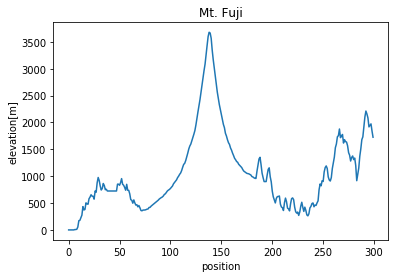

In [0]:
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3]) # その地点の番号は0からの連番なので省略も可能（しかし、番号が異なる場合もありえるので解答例としては明示）
plt.show()

以下のように変数に入れても見やすいでしょう。

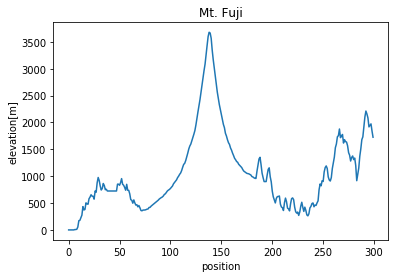

In [0]:
fuji_positions = fuji[:, 0]
fuji_elevations = fuji[:, 3]

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji_positions, fuji_elevations)
plt.show()

### （発展的な解説）

### 参照渡しとコピーについて

このようにndarrayをスライスして別の変数名を置いた場合、これは参照渡しであることを確認しておきましょう。

参照渡しであるため、`fuji_positions`の方の要素を変更すると、元の`fuji`も変更されます。

以下がその例です。

In [0]:
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print("fuji[:10, 0]を表示\n{}".format(fuji[:10, 0]))
fuji_positions = fuji[:, 0] # 代入（参照渡し）
print("fuji_positions[:10]を表示\n{}".format(fuji_positions[:10]))
fuji_positions[0] = 100 # 0番目のインデックスに100を入れる
print("書き換え後のfuji_positions[:10]を表示\n{}".format(fuji_positions[:10]))
print("書き換え後のfuji[:10, 0]を表示\n{}".format(fuji[:10, 0])) # <-元のfujiも書き換わっている

fuji[:10, 0]を表示
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
fuji_positions[:10]を表示
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
書き換え後のfuji_positions[:10]を表示
[100.   1.   2.   3.   4.   5.   6.   7.   8.   9.]
書き換え後のfuji[:10, 0]を表示
[100.   1.   2.   3.   4.   5.   6.   7.   8.   9.]


このように元のndarrayも書き換わるため、別のndarrayのつもりで変更してしまうと、バグが発生することがある点に注意です。

一方で、このような働きをすることのメリットとして、メモリが節約されるという点が言えます。何GBにもなる大規模なデータセットを用いて機械学習を行う場合でも、このようにndarrayの一部に別の名前をつけて問題ないということになります。

`fuji[:, 0]`と`fuji_positions`がメモリ上で共有されていることを`np.may_share_memory()`で確認してみます。共有されていればTrueが返ってきます。

[numpy.may_share_memory — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.may_share_memory.html)

In [0]:
print("メモリが共有されているか：{}".format(np.may_share_memory(fuji[:, 0], fuji_positions)))

print("fuji[:, 0]のID：{}".format(id(fuji[:, 0])))
print("fuji_positionsのID：{}".format(id(fuji_positions)))

メモリが共有されているか：True
fuji[:, 0]のID：4533072240
fuji_positionsのID：4497697888


もしもメモリを共有せず、コピーを作成したい場合は`copy`メソッドを使います。

In [0]:
fuji_positions_copy = fuji[:, 3].copy()
print("メモリが共有されているか：{}".format(np.may_share_memory(fuji[:, 0], fuji_positions_copy)))

メモリが共有されているか：False


この`copy`メソッドに対応するものとして、参照渡しを明示する場合は`view`メソッドというものも用意されています。

In [0]:
fuji_positions_view = fuji[:, 3].view()
print("メモリが共有されているか：{}".format(np.may_share_memory(fuji[:, 0], fuji_positions_view)))

メモリが共有されているか：True


### 演算によるコピーか参照かの違い

ndarrayは演算の書き方によりコピーか参照かの挙動が変わってきます。

大規模なデータセットで機械学習を行う場合、メモリの容量に余裕がなくなるためこの違いを意識する必要が出てきます。

`b_ndarray = b_ndarray + 1`はコピーですが、`b_ndarray += 1`は参照渡しになります。ndarrayに何かを演算したい場合は **代入演算子** を使用した方がメモリを節約できることになります。

以下がその例です。

In [0]:
a_ndarray = np.array([0, 1, 2])

b_ndarray = a_ndarray # 参照渡し

print("a_ndarrayとb_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, b_ndarray)))

b_ndarray = b_ndarray + 1 # この時点でコピーが作成される

print("a_ndarrayとb_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, b_ndarray)))

a_ndarrayとb_ndarrayのメモリが共有されているか：True
a_ndarrayとb_ndarrayのメモリが共有されているか：False


In [0]:
a_ndarray = np.array([0, 1, 2])

b_ndarray = a_ndarray # 参照渡し

print("a_ndarrayとb_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, b_ndarray)))

b_ndarray += 1 # コピーではなく参照渡し

print("a_ndarrayとb_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, b_ndarray)))

a_ndarrayとb_ndarrayのメモリが共有されているか：True
a_ndarrayとb_ndarrayのメモリが共有されているか：True


### Pythonのリストとの比較

Pythonのリストも`b = a`のようにした場合参照渡しです。

しかし、`c = a[:]`のようにスライスを行った場合は、コピーになります。

一方、ndarrayではスライスを行っても参照渡しであることは先ほど確認した通りです。

Pythonのリストとndarrayのその性質の比較が以下です。

組み込み関数`id`によってその変数（オブジェクト）の **ID（識別子）** を表示させています。IDが同じであればメモリが共有されています。ndarrayの場合、スライスを行った場合IDは変化しますが、値はメモリ上で共有されています。（このことを確認するために`np.may_share_memory()`を使います）

In [0]:
a = [0, 1, 2]
b = a # 参照渡し
c = a[:] # コピー

print("aのID：{}".format(id(a)))
print("bのID：{}".format(id(b)))
print("cのID：{}".format(id(c))) # IDが変わっている

b[0] = 100
print("bを書き換えた後のa：{}".format(a))

c[2] = 100
print("cを書き換えた後のa：{}".format(a))

aのID：4533096904
bのID：4533096904
cのID：4532443080
bを書き換えた後のa：[100, 1, 2]
cを書き換えた後のa：[100, 1, 2]


In [0]:
a_ndarray = np.array([0, 1, 2])
b_ndarray = a_ndarray # 参照渡し
c_ndarray = a_ndarray[:] # こちらも参照渡し

print("a_ndarrayとb_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, b_ndarray)))
print("a_ndarrayとc_ndarrayのメモリが共有されているか：{}".format(np.may_share_memory(a_ndarray, c_ndarray)))

print("a_ndarrayのID：{}".format(id(a_ndarray)))
print("b_ndarrayのID：{}".format(id(b_ndarray)))
print("c_ndarrayのID：{}".format(id(c_ndarray))) # IDは変わっているが、値はメモリ上で共有されている

b_ndarray[0] = 100
print("b_ndarrayを書き換えた後のa_ndarray：{}".format(a_ndarray))

c_ndarray[2] = 100
print("c_ndarrayを書き換えた後のa_ndarray：{}".format(a_ndarray))

a_ndarrayとb_ndarrayのメモリが共有されているか：True
a_ndarrayとc_ndarrayのメモリが共有されているか：True
a_ndarrayのID：4533176960
b_ndarrayのID：4533176960
c_ndarrayのID：4533176880
b_ndarrayを書き換えた後のa_ndarray：[100   1   2]
c_ndarrayを書き換えた後のa_ndarray：[100   1 100]


In [0]:
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # fujiを書き換えてしまったので、もう一度ロードしておく

### 【問題2】ある地点の勾配を計算する関数を作成

「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

[![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)](https://diveintocode.gyazo.com/7fd04c4808b8a0150a49c908e21f3cd2)

#### （解説）

勾配を求める式をコードに落とし込みます。

xの変化量（地点の番号の差）は常に1になるため、省略することが可能です。ただし、番号が常に連番ではないことを想定し、書いておいても良いでしょう。

In [0]:
def compute_gradient(position, elevations):
    """
    今いる地点の勾配を計算する。

    Parameters
    ----------------
    position : int
    今いる地点の番号
    elevations : ndarray, shape(n,)
    標高

    Returns
    ----------------
    gradient : numpy.float
    今いる地点の勾配
    """
    return elevations[position] - elevations[position-1]

In [0]:
position = 136
fuji_elevations = fuji[:, 3]
print("{}番地点の勾配：{}".format(position, compute_gradient(position, fuji_elevations)))

136番地点の勾配：168.35000000000036


In [0]:
# 同じ関数のまま、引数にndarrayを渡すことで複数地点にも拡張できる

positions = np.array([135, 136, 137])
fuji_elevations = fuji[:, 3]
print("{}番地点の勾配：{}".format(positions, compute_gradient(positions, fuji_elevations)))

[135 136 137]番地点の勾配：[178.43 168.35 165.49]


### 【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと **「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」** となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとる**ハイパーパラメータ**です。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

**実装上の注意**

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

**ハイパーパラメータとは**

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

#### （解説）

数式をそのままプログラムとして書いた上で、いくつかの処理を加える必要があります。

> 今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。

`np.round()`が使えます。正確さを求めるな decimal もありますが、まずは round で問題ありません。

[numpy.round — NumPy v1.13 Manual](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html)

> 移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

こういった場合の実装はいろいろな方法が考えられますが、`np.maximum()`や`np.minimum()`を使う方法が便利です。

[numpy.maximum — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html)

[numpy.minimum — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.minimum.html#numpy.minimum)

NumPyの関数を使うことで、処理が効率的になったり、配列の入力に拡張しやすくなります。

In [0]:
def compute_next_position(position, elevations, alpha=0.1):
    """
    次に移動する地点を計算する。

    Parameters
    ----------------
    position : int
    今いる地点の番号
    elevations : ndarray, shape(n,)
    標高
    alpha : float or int
    どれだけ移動するかに関わるハイパーパラメータ

    Returns
    ----------------
    next_position_int : numpy.int
    次に移動する地点
    """
    next_position = position - alpha*compute_gradient(position, elevations)
    next_position = np.maximum(1, next_position) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    next_position = np.minimum(len(elevations)-1, next_position) # 範囲より大きい値を範囲内に収める
    next_position_int = np.round(next_position).astype(np.int)
    return next_position_int

In [0]:
position = 136
fuji_elevations = fuji[:, 3]

next_position = compute_next_position(position , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(position, next_position))

136番地点の次に移動する地点：119


In [0]:
# 同じ関数のまま、引数にndarrayを渡すことで複数地点にも拡張できる

positions = np.array([135, 136, 137])
fuji_elevations = fuji[:, 3]

next_positions = compute_next_position(positions , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(positions, next_positions))

[135 136 137]番地点の次に移動する地点：[117 119 120]


### 【問題4】山を下る関数を作成

山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

**実装上の注意**

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

#### （解説）

移動先の地点が今いる地点と同じになったらループを抜けるという条件でwhile文を書きます。

さらに発展的にこの問題を考えると、同じ経路を周り続けるという状況もありえます。これらを包括する条件として、「過去に通った地点に来たらループを抜ける」とします。

In [0]:
def descend_mountain(start_position, elevations, alpha=0.1):
    """
    山を下る過程を計算する。

    Parameters
    ----------------
    start_position : int
    最初の地点の番号
    elevations : ndarray, shape(n,)
    標高
    alpha : float or int
    どれだけ移動するかに関わるハイパーパラメータ

    Returns
    ----------------
    list of int
    山を下る過程で通る地点の番号のリスト
    """
    positions = [start_position]
    while positions[-1] not in positions[:-1]:
        positions.append(compute_next_position(positions[-1], elevations, alpha=alpha))
    return positions[:-1]

In [0]:
start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mountain(start_position, fuji_elevations, alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(descended_list))

山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


#### （別解）

`while True:`とif文の組み合わせだあれば次のようになります。

In [0]:
def descend_mountain_2(start_position, elevations, alpha=0.1):
    """
    山を下る過程を計算する。

    Parameters
    ----------------
    start_position : int
    最初の地点の番号
    elevations : ndarray, shape(n,)
    標高
    alpha : float or int
    どれだけ移動するかに関わるハイパーパラメータ

    Returns
    ----------------
    list of int
    山を下る過程で通る地点の番号のリスト
    """
    positions = [start_position]
    while True:
        positions.append(compute_next_position(positions[-1], elevations, alpha=alpha))
        if positions[-1] in positions[:-1]:
            return positions[:-1]

In [0]:
start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mountain_2(start_position, fuji_elevations, alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(descended_list))

山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


### 【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。

**可視化例**

- 断面図の中に移動した地点を点で表示する
- 繰り返し毎の標高や勾配を折れ線グラフにする

#### （解説）

> 断面図の中に移動した地点を点で表示する

点で表示するには`plt.scatter()`を使います。問題4で作成したリストをインデキシングのために`fuji_elevations[descended_list]`のように使うことで、下山過程の標高のリストが得られます。これを高さ方向の値にすることで、点を打っていくことができます。

> 繰り返し毎の標高や勾配を折れ線グラフにする

折れ線グラフには`plt.plot()`を使います。こちらも高さ方向の値のリストを作ります。

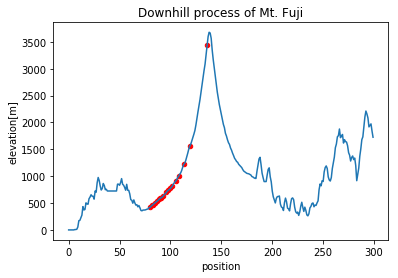

In [0]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 断面図の中に移動した地点を点で表示する
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()

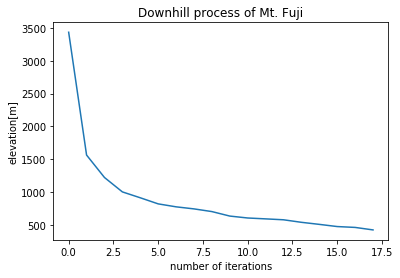

In [0]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 繰り返し毎の標高を折れ線グラフにする
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('number of iterations')
plt.plot(descended_elevations)
plt.show()

### 【問題6】初期値の変更

問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては **初期値** をどう設定するかが結果に影響を与えることが確認できます。

**初期値とは**

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

#### （解説）

for文で初期値を変えながら、リストに代入していきます。

問題4の関数を複数の初期値に対応させていれば、for文ではなくNumPyによる計算に置き換えることも考えられます。

In [0]:
descended_lists = []
for i, start_position in enumerate(range(1, 300)):
    descended_lists.append(descend_mountain(start_position, fuji[:, 3], alpha=0.2))
print("作成したリストの種類：{}".format(len(descended_lists))) #299通り計算できたことを確認

作成したリストの種類：299


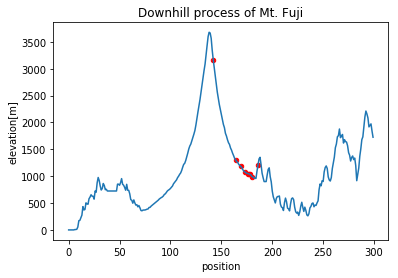

In [0]:
# 逆側を降りる様子を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[141], fuji[:, 3][descended_lists[141]], 20, color='red')
plt.show()

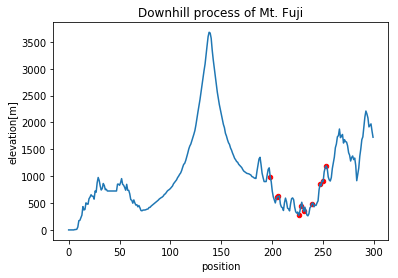

In [0]:
# さらに異なる位置を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[249], fuji[:, 3][descended_lists[249]], 20, color='red')
plt.show()

### 【問題7】（アドバンス問題）ハイパーパラメータの変更

ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

#### （解説）

問題6のコードを初期値ではなく $\alpha$に対して適用するように書き換えます。

グラフを描画する際にもfor文を使うことで、簡単に複数描くことができます。

In [0]:
start_position = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])

descended_lists_alphas = []
for i, alpha in enumerate(alphas):
    descended_lists_alphas.append(descend_mountain(start_position, fuji[:, 3], alpha=alpha))
print("作成したリストの種類：{}".format(len(descended_lists_alphas)))

作成したリストの種類：6


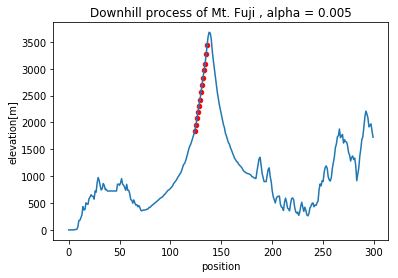

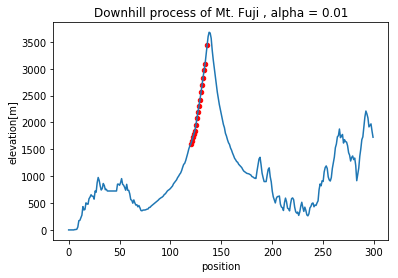

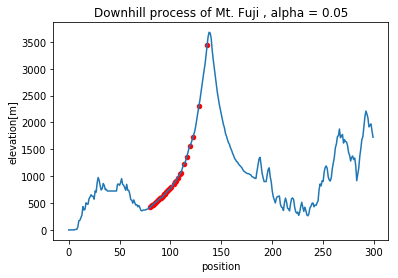

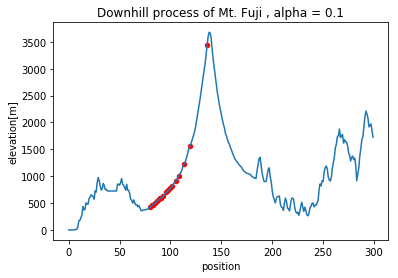

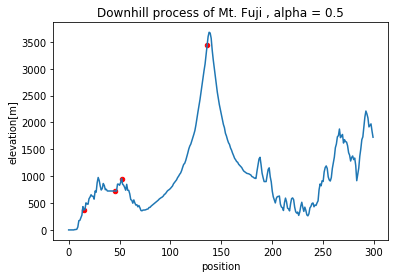

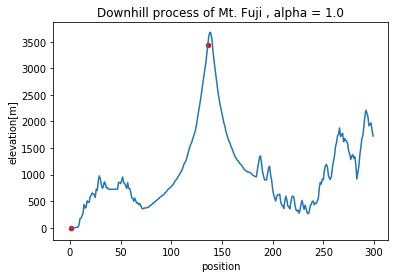

In [0]:
for i, alpha in enumerate(alphas):
    plt.title('Downhill process of Mt. Fuji , alpha = {}'.format(alpha))
    plt.ylabel('elevation[m]')
    plt.xlabel('position')
    plt.plot(fuji[:, 3])
    plt.scatter(descended_lists_alphas[i], fuji[:, 3][descended_lists_alphas[i]], 20, color='red')
    plt.show()

In [ ]:
地点では無く標高